In [3]:
import tensorflow as tf

import numpy as np
import pandas as pd

In [4]:
print(tf.__version__)

2.0.0


In [ ]:
# GPU setting(nvidia) - tensorflow - keras 순으로 설치

In [6]:
rand = tf.random.uniform([1],0,1)
print(rand)

# tensorflow random test

tf.Tensor([0.46751583], shape=(1,), dtype=float32)


In [5]:
# 0차원
arr = np.array(10)
arr.shape

()

In [6]:
# 1차원
arr = np.array([10])
arr.shape

(1,)

In [7]:
# 1차원
arr = np.array([10,20,30])
arr.shape

(3,)

In [11]:
# 2차원
arr = np.array(np.arange(1,10))
arr = arr.reshape(3,3)
arr.shape

(3, 3)

In [12]:
# 2차원
arr = np.array([[10]])
arr.shape

(1, 1)

In [17]:
# 다차원
arr = np.array(list(np.arange(1,10))*2)
arr = arr.reshape(2,3,3)
arr.shape

(2, 3, 3)

In [18]:
# tensorflow 타입(Tensor)으로 변환하기 위해서 사용되는것
tf.constant([1,2,3])

<tf.Tensor: id=0, shape=(3,), dtype=int32, numpy=array([1, 2, 3])>

In [20]:
# tuple -> tensor
tf.constant(((1,2,3),(4,5,6)))

<tf.Tensor: id=1, shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]])>

In [23]:
tensor = tf.constant(arr)
tensor

<tf.Tensor: id=3, shape=(2, 3, 3), dtype=int32, numpy=
array([[[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]],

       [[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]])>

In [ ]:
# name, shape, dtype : 이런것들을 

In [24]:
tensor.shape

TensorShape([2, 3, 3])

In [25]:
# 형변혼해서 tensor타입으로 변형하기
tensor = tf.constant(arr, dtype=tf.float32)
tensor

# numpy array 와 같은 변경함

<tf.Tensor: id=4, shape=(2, 3, 3), dtype=float32, numpy=
array([[[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]],

       [[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]]], dtype=float32)>

numpy
받을때는 dtype parameter
변경할때는 astype

tensorflow
받을때는 dtype parameter
변경할때는 cast

In [26]:
tf.cast(tensor, dtype=tf.uint8)

<tf.Tensor: id=5, shape=(2, 3, 3), dtype=uint8, numpy=
array([[[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]],

       [[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]], dtype=uint8)>

In [27]:
np.random.randn(10)

array([ 1.61813459,  0.26167831,  0.55212324,  0.80421853, -0.84224104,
        0.32457105, -0.48479935,  1.77303761,  1.08565195,  0.57377431])

In [28]:
# 정규화 처리
tf.random.normal([4,4])

<tf.Tensor: id=11, shape=(4, 4), dtype=float32, numpy=
array([[ 0.77263004,  1.1836357 , -1.63473   , -0.9391746 ],
       [-1.0445695 ,  0.6790471 , -1.7967407 , -0.00689601],
       [-1.0020131 , -0.35778728,  0.4184832 ,  0.9212682 ],
       [-2.048013  ,  0.9761423 ,  0.4996412 , -0.22843698]],
      dtype=float32)>

In [29]:
# 균등처리
tf.random.uniform([4, 4])

<tf.Tensor: id=18, shape=(4, 4), dtype=float32, numpy=
array([[0.98917544, 0.27845514, 0.7310637 , 0.9149085 ],
       [0.05318546, 0.9156238 , 0.213781  , 0.6210542 ],
       [0.44818473, 0.5252738 , 0.08254421, 0.1409148 ],
       [0.41430008, 0.9925411 , 0.35115063, 0.7368189 ]], dtype=float32)>

data load

In [30]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test,y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

11493376/11490434 [==============================] - 2s 0us/step


In [32]:
x_train.shape

(60000, 28, 28)

In [33]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(10, activation='softmax')])

# 각 단계별 표현
# Dense(output 갯수, activation function = 'softmax'--useclassifier )

# 채점기준

cost function(loss) = MSE 등등..
 - 작아짐 : 학습이되는가, w값이 튜닝되나
Optimizer  = GD, SGD, Adam

metrics = accuracy, f1 score, MSE
 - 학습된 성능이 어떻게 잘 나오는가

In [34]:
model.compile(optimizer = 'Adamax', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.compile(optimizer='Adamax',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [35]:
model.fit(x_train, y_train, epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 7s 111us/sample - loss: 0.4260 - accuracy: 0.8809
Epoch 2/3
60000/60000 [==============================] - 6s 93us/sample - loss: 0.2417 - accuracy: 0.9305
Epoch 3/3
60000/60000 [==============================] - 6s 102us/sample - loss: 0.1915 - accuracy: 0.9459 -


In [37]:
model.evaluate(x_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.1498436045691371, 0.9555]

In [39]:
# 균일분포, 갯수, start, end
rand = tf.random.uniform([1],0,1)
print(rand)

tf.Tensor([0.7336967], shape=(1,), dtype=float32)


In [43]:
# 균일분포, 갯수, start, end
rand = tf.random.uniform([1],1,10)
print(rand)

tf.Tensor([4.568895], shape=(1,), dtype=float32)


In [45]:
# 정규분포, 갯수, start, end
rand = tf.random.normal([4],0,1)
print(rand)

tf.Tensor([-1.3355415   2.243967   -0.44368333  1.5011026 ], shape=(4,), dtype=float32)


In [46]:
import math
def sigmoid(x) :
    return 1/ (1+math.exp(-x))

In [47]:
# 뉴런의 입력과 출력 정의
# activation function = a() 표현을 이렇게 함

x = 1
y = 0
w = tf.random.normal([1],0,1)
output = sigmoid(x*w)
print(output)

0.3458745792965907


In [51]:
for i in range(1000) :
    output = sigmoid(x*w)
    error = y - output
    w = w + x * 0.1 * error
    
    if i% 100 == 99:
        print(i,error, output)

99 -0.000992681218874773 0.000992681218874773
199 -0.0009829327520592232 0.0009829327520592232
299 -0.0009733740495790947 0.0009733740495790947
399 -0.0009639995946803187 0.0009639995946803187
499 -0.0009548031200036997 0.0009548031200036997
599 -0.0009457803482842501 0.0009457803482842501
699 -0.0009369253303667799 0.0009369253303667799
799 -0.0009282380418980528 0.0009282380418980528
899 -0.0009197096541279556 0.0009197096541279556
999 -0.0009113350924263844 0.0009113350924263844


In [52]:
for i in range(1000) :
    output = sigmoid(x*w)
    error = y - output
    w = w + x * 0.8 * error
    
    if i% 100 == 99:
        print(i,error, output)

99 -0.0008499389978005793 0.0008499389978005793
199 -0.0007958524086672153 0.0007958524086672153
299 -0.0007482361396495042 0.0007482361396495042
399 -0.0007059947086068072 0.0007059947086068072
499 -0.0006682668899960369 0.0006682668899960369
599 -0.0006343660408937125 0.0006343660408937125
699 -0.0006037390178398347 0.0006037390178398347
799 -0.0005759320370483043 0.0005759320370483043
899 -0.0005505730508068243 0.0005505730508068243
999 -0.0005273534871593416 0.0005273534871593416


In [53]:
# x가 0이 들어가면 1000번돌았지만 학습이 하나도 안됨

x = 0
y = 1
w = tf.random.normal([1],0,1)

for i in range(1000) :
    output = sigmoid(x*w)
    error = y - output
    w = w + x * 0.8 * error
    
    if i% 100 == 99:
        print(i,error, output)

99 0.5 0.5
199 0.5 0.5
299 0.5 0.5
399 0.5 0.5
499 0.5 0.5
599 0.5 0.5
699 0.5 0.5
799 0.5 0.5
899 0.5 0.5
999 0.5 0.5


In [54]:
# x가 0이 들어가면 1000번돌았지만 학습이 하나도 안됨
# bias를 통해 추가로 학습의 편향을 더함

x = 0
y = 1
w = tf.random.normal([1],0,1)
b = tf.random.normal([1],0,1)

for i in range(1000) :
    output = sigmoid(x*w+1*b)
    error = y - output
    w = w + x * 0.8 * error
    b = b + 1*0.1* error
    
    if i% 100 == 99:
        print(i,error, output)

99 0.07607420650972418 0.9239257934902758
199 0.044254481602419515 0.9557455183975805
299 0.031012513482636006 0.968987486517364
399 0.02381694593519279 0.9761830540648072
499 0.019311327890270902 0.9806886721097291
599 0.016229861953278135 0.9837701380467219
699 0.013991582826633264 0.9860084171733667
799 0.01229303745140431 0.9877069625485957
899 0.010960507426049593 0.9890394925739504
999 0.009887498867234723 0.9901125011327653


신경망 네트워크 : AND

In [56]:
x = np.array([[1,1],[1,0],[0,1],[0,0]])
x

array([[1, 1],
       [1, 0],
       [0, 1],
       [0, 0]])

In [58]:
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[1], [0], [0], [0]])
w = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)
b_x = 1

for i in range(2000):
    error_sum = 0
    for j in range(4):
        output = sigmoid(np.sum(x[j]*w)+b_x*b)
        error = y[j][0] - output
        w = w + x[j] * 0.1 * error
        b = b + b_x * 0.1 * error
        error_sum += error
        
    if i % 200 == 199:
        print(i, error_sum)

199 -0.105919788695199
399 -0.06413302102592737
599 -0.04586609548688712
799 -0.03559764544317446
999 -0.029034631824301407
1199 -0.02448689088613281
1399 -0.021155437120181603
1599 -0.018612655079827914
1799 -0.01660883720830024
1999 -0.014989901292454541


In [59]:
# 3.20 AND 네트워크의 평가
for i in range(4):
    print('X:', x[i], 'Y:', y[i], 'Output:', sigmoid(np.sum(x[i]*w)+b))

X: [1 1] Y: [1] Output: 0.9650046396990521
X: [1 0] Y: [0] Output: 0.02479982077911947
X: [0 1] Y: [0] Output: 0.024875399546431812
X: [0 0] Y: [0] Output: 2.352532179892466e-05


In [60]:
# 3.21 두번째 신경망 네트워크 : OR
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[1], [1], [1], [0]])
w = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)
b_x = 1

for i in range(2000):
    error_sum = 0
    for j in range(4):
        output = sigmoid(np.sum(x[j]*w)+b_x*b)
        error = y[j][0] - output
        w = w + x[j] * 0.1 * error
        b = b + b_x * 0.1 * error
        error_sum += error
        
    if i % 200 == 199:
        print(i, error_sum)

199 -0.05030829198594297
399 -0.026098762311504903
599 -0.017500379527958784
799 -0.013116380800678146
999 -0.01046940919368717
1199 -0.008702268286256462
1399 -0.007440924435443419
1599 -0.0064957612479277435
1799 -0.005762406747758724
1999 -0.005175465626624395


In [61]:
# 3.22 OR 네트워크의 평가
for i in range(4):
    print('X:', x[i], 'Y:', y[i], 'Output:', sigmoid(np.sum(x[i]*w)+b))

X: [1 1] Y: [1] Output: 0.9999971629859787
X: [1 0] Y: [1] Output: 0.9897410808189356
X: [0 1] Y: [1] Output: 0.9897136505424017
X: [0 0] Y: [0] Output: 0.025659099115957172


In [ ]:
# machine Learning에서 문제가 되는 부분에 대해서

In [62]:
# 3.23 세번째 신경망 네트워크 : XOR
import numpy as np
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[0], [1], [1], [0]])
w = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)
b_x = 1

for i in range(2000):
    error_sum = 0
    for j in range(4):
        output = sigmoid(np.sum(x[j]*w)+b_x*b)
        error = y[j][0] - output
        w = w + x[j] * 0.1 * error
        b = b + b_x * 0.1 * error
        error_sum += error
        
    if i % 200 == 199:
        print(i, error_sum)

199 -0.0033763088367225746
399 -0.00013726882072340185
599 -5.585188114998196e-06
799 -2.4291544142851507e-07
999 4.653552765354618e-09
1199 3.722842145670313e-09
1399 3.722842145670313e-09
1599 3.722842145670313e-09
1799 3.722842145670313e-09
1999 3.722842145670313e-09


In [63]:
# 3.24 XOR 네트워크의 평가
for i in range(4):
    print('X:', x[i], 'Y:', y[i], 'Output:', sigmoid(np.sum(x[i]*w)+b))

X: [1 1] Y: [0] Output: 0.5128176286712095
X: [1 0] Y: [1] Output: 0.5128176305326305
X: [0 1] Y: [1] Output: 0.4999999990686774
X: [0 0] Y: [0] Output: 0.5000000009313226


이부분을 layer를 쌓아서 해결을 본다

In [64]:
# model의 Sequential을 각각 쌓아서 처리함, 2진분류에서는 sigmoid 상관없음, 여러개면 softmax로 
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[0], [1], [1], [0]])

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=2, activation='sigmoid', input_shape=(2,)),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])
# optimizer : tf.keras.ptimizers.SGD(learning_rate = 0.3)
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.3), loss='mse')

# model의 요약정보 출력
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [65]:
# 3.28 tf.keras 를 이용한 XOR 네트워크 학습
history = model.fit(x, y, epochs=2000, batch_size=1)

Train on 4 samples
Epoch 1/2000
4/4 [==============================] - 0s 90ms/sample - loss: 0.2605
Epoch 2/2000
4/4 [==============================] - 0s 985us/sample - loss: 0.2604
Epoch 3/2000
4/4 [==============================] - 0s 984us/sample - loss: 0.2603
Epoch 4/2000
4/4 [==============================] - 0s 775us/sample - loss: 0.2602
Epoch 5/2000
4/4 [==============================] - 0s 748us/sample - loss: 0.2601
Epoch 6/2000
4/4 [==============================] - 0s 733us/sample - loss: 0.2601
Epoch 7/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2593
Epoch 8/2000
4/4 [==============================] - 0s 748us/sample - loss: 0.2593
Epoch 9/2000
4/4 [==============================] - 0s 997us/sample - loss: 0.2600
Epoch 10/2000
4/4 [==============================] - 0s 748us/sample - loss: 0.2599
Epoch 11/2000
4/4 [==============================] - 0s 748us/sample - loss: 0.2598
Epoch 12/2000
4/4 [==============================] - 0s 997us/sample 

4/4 [==============================] - 0s 983us/sample - loss: 0.2478
Epoch 99/2000
4/4 [==============================] - 0s 997us/sample - loss: 0.2470
Epoch 100/2000
4/4 [==============================] - 0s 997us/sample - loss: 0.2473
Epoch 101/2000
4/4 [==============================] - 0s 997us/sample - loss: 0.2471
Epoch 102/2000
4/4 [==============================] - 0s 748us/sample - loss: 0.2463
Epoch 103/2000
4/4 [==============================] - 0s 977us/sample - loss: 0.2466
Epoch 104/2000
4/4 [==============================] - 0s 997us/sample - loss: 0.2465
Epoch 105/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2462
Epoch 106/2000
4/4 [==============================] - 0s 977us/sample - loss: 0.2459
Epoch 107/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2452
Epoch 108/2000
4/4 [==============================] - 0s 998us/sample - loss: 0.2455
Epoch 109/2000
4/4 [==============================] - 0s 997us/sample - loss: 0.2452


4/4 [==============================] - 0s 1ms/sample - loss: 0.2164
Epoch 196/2000
4/4 [==============================] - 0s 999us/sample - loss: 0.2161
Epoch 197/2000
4/4 [==============================] - 0s 997us/sample - loss: 0.2157
Epoch 198/2000
4/4 [==============================] - 0s 997us/sample - loss: 0.2150
Epoch 199/2000
4/4 [==============================] - 0s 997us/sample - loss: 0.2151
Epoch 200/2000
4/4 [==============================] - 0s 967us/sample - loss: 0.2147
Epoch 201/2000
4/4 [==============================] - 0s 971us/sample - loss: 0.2137
Epoch 202/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2136
Epoch 203/2000
4/4 [==============================] - 0s 997us/sample - loss: 0.2136
Epoch 204/2000
4/4 [==============================] - 0s 737us/sample - loss: 0.2131
Epoch 205/2000
4/4 [==============================] - 0s 982us/sample - loss: 0.2129
Epoch 206/2000
4/4 [==============================] - 0s 997us/sample - loss: 0.2125

4/4 [==============================] - 0s 1ms/sample - loss: 0.1848
Epoch 293/2000
4/4 [==============================] - 0s 984us/sample - loss: 0.1844
Epoch 294/2000
4/4 [==============================] - 0s 984us/sample - loss: 0.1841
Epoch 295/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.1837
Epoch 296/2000
4/4 [==============================] - 0s 980us/sample - loss: 0.1838
Epoch 297/2000
4/4 [==============================] - 0s 982us/sample - loss: 0.1834
Epoch 298/2000
4/4 [==============================] - 0s 997us/sample - loss: 0.1831
Epoch 299/2000
4/4 [==============================] - 0s 748us/sample - loss: 0.1828
Epoch 300/2000
4/4 [==============================] - 0s 746us/sample - loss: 0.1823
Epoch 301/2000
4/4 [==============================] - 0s 998us/sample - loss: 0.1823
Epoch 302/2000
4/4 [==============================] - 0s 748us/sample - loss: 0.1820
Epoch 303/2000
4/4 [==============================] - 0s 748us/sample - loss: 0.1817

Epoch 389/2000
4/4 [==============================] - 0s 748us/sample - loss: 0.1512
Epoch 390/2000
4/4 [==============================] - 0s 982us/sample - loss: 0.1505
Epoch 391/2000
4/4 [==============================] - 0s 997us/sample - loss: 0.1503
Epoch 392/2000
4/4 [==============================] - 0s 998us/sample - loss: 0.1496
Epoch 393/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.1494
Epoch 394/2000
4/4 [==============================] - 0s 748us/sample - loss: 0.1488
Epoch 395/2000
4/4 [==============================] - 0s 775us/sample - loss: 0.1480
Epoch 396/2000
4/4 [==============================] - 0s 981us/sample - loss: 0.1480
Epoch 397/2000
4/4 [==============================] - 0s 728us/sample - loss: 0.1471
Epoch 398/2000
4/4 [==============================] - 0s 868us/sample - loss: 0.1469
Epoch 399/2000
4/4 [==============================] - 0s 998us/sample - loss: 0.1461
Epoch 400/2000
4/4 [==============================] - 0s 997us/samp

4/4 [==============================] - 0s 997us/sample - loss: 0.0869
Epoch 486/2000
4/4 [==============================] - 0s 997us/sample - loss: 0.0865
Epoch 487/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0856
Epoch 488/2000
4/4 [==============================] - 0s 996us/sample - loss: 0.0851
Epoch 489/2000
4/4 [==============================] - 0s 764us/sample - loss: 0.0840
Epoch 490/2000
4/4 [==============================] - 0s 772us/sample - loss: 0.0837
Epoch 491/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0826
Epoch 492/2000
4/4 [==============================] - 0s 748us/sample - loss: 0.0818
Epoch 493/2000
4/4 [==============================] - 0s 997us/sample - loss: 0.0812
Epoch 494/2000
4/4 [==============================] - 0s 997us/sample - loss: 0.0808
Epoch 495/2000
4/4 [==============================] - 0s 997us/sample - loss: 0.0797
Epoch 496/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0794
E

4/4 [==============================] - 0s 997us/sample - loss: 0.0378
Epoch 583/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0375
Epoch 584/2000
4/4 [==============================] - 0s 998us/sample - loss: 0.0372
Epoch 585/2000
4/4 [==============================] - 0s 761us/sample - loss: 0.0369
Epoch 586/2000
4/4 [==============================] - 0s 743us/sample - loss: 0.0366
Epoch 587/2000
4/4 [==============================] - 0s 993us/sample - loss: 0.0363
Epoch 588/2000
4/4 [==============================] - 0s 733us/sample - loss: 0.0360
Epoch 589/2000
4/4 [==============================] - 0s 764us/sample - loss: 0.0358
Epoch 590/2000
4/4 [==============================] - 0s 988us/sample - loss: 0.0355
Epoch 591/2000
4/4 [==============================] - 0s 980us/sample - loss: 0.0352
Epoch 592/2000
4/4 [==============================] - 0s 998us/sample - loss: 0.0349
Epoch 593/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0347

4/4 [==============================] - 0s 1ms/sample - loss: 0.0199
Epoch 680/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0198
Epoch 681/2000
4/4 [==============================] - 0s 981us/sample - loss: 0.0197
Epoch 682/2000
4/4 [==============================] - 0s 748us/sample - loss: 0.0196
Epoch 683/2000
4/4 [==============================] - 0s 997us/sample - loss: 0.0195
Epoch 684/2000
4/4 [==============================] - 0s 983us/sample - loss: 0.0194
Epoch 685/2000
4/4 [==============================] - 0s 997us/sample - loss: 0.0193
Epoch 686/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0192
Epoch 687/2000
4/4 [==============================] - 0s 981us/sample - loss: 0.0191
Epoch 688/2000
4/4 [==============================] - 0s 990us/sample - loss: 0.0190
Epoch 689/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0189
Epoch 690/2000
4/4 [==============================] - 0s 984us/sample - loss: 0.0188
Epo

4/4 [==============================] - 0s 997us/sample - loss: 0.0127
Epoch 776/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0127
Epoch 777/2000
4/4 [==============================] - 0s 749us/sample - loss: 0.0126
Epoch 778/2000
4/4 [==============================] - 0s 748us/sample - loss: 0.0126
Epoch 779/2000
4/4 [==============================] - 0s 731us/sample - loss: 0.0125
Epoch 780/2000
4/4 [==============================] - 0s 997us/sample - loss: 0.0125
Epoch 781/2000
4/4 [==============================] - 0s 791us/sample - loss: 0.0124
Epoch 782/2000
4/4 [==============================] - 0s 732us/sample - loss: 0.0124
Epoch 783/2000
4/4 [==============================] - 0s 758us/sample - loss: 0.0123
Epoch 784/2000
4/4 [==============================] - 0s 743us/sample - loss: 0.0123
Epoch 785/2000
4/4 [==============================] - 0s 748us/sample - loss: 0.0122
Epoch 786/2000
4/4 [==============================] - 0s 732us/sample - loss: 0.01

4/4 [==============================] - 0s 765us/sample - loss: 0.0091
Epoch 872/2000
4/4 [==============================] - 0s 731us/sample - loss: 0.0091
Epoch 873/2000
4/4 [==============================] - 0s 747us/sample - loss: 0.0091
Epoch 874/2000
4/4 [==============================] - 0s 997us/sample - loss: 0.0090
Epoch 875/2000
4/4 [==============================] - 0s 748us/sample - loss: 0.0090
Epoch 876/2000
4/4 [==============================] - 0s 777us/sample - loss: 0.0090
Epoch 877/2000
4/4 [==============================] - 0s 952us/sample - loss: 0.0089
Epoch 878/2000
4/4 [==============================] - 0s 997us/sample - loss: 0.0089
Epoch 879/2000
4/4 [==============================] - 0s 997us/sample - loss: 0.0089
Epoch 880/2000
4/4 [==============================] - 0s 748us/sample - loss: 0.0089
Epoch 881/2000
4/4 [==============================] - 0s 997us/sample - loss: 0.0088
Epoch 882/2000
4/4 [==============================] - 0s 808us/sample - loss: 0.

4/4 [==============================] - 0s 733us/sample - loss: 0.0070
Epoch 968/2000
4/4 [==============================] - 0s 748us/sample - loss: 0.0070
Epoch 969/2000
4/4 [==============================] - 0s 763us/sample - loss: 0.0070
Epoch 970/2000
4/4 [==============================] - 0s 997us/sample - loss: 0.0069
Epoch 971/2000
4/4 [==============================] - 0s 733us/sample - loss: 0.0069
Epoch 972/2000
4/4 [==============================] - 0s 734us/sample - loss: 0.0069
Epoch 973/2000
4/4 [==============================] - 0s 747us/sample - loss: 0.0069
Epoch 974/2000
4/4 [==============================] - 0s 514us/sample - loss: 0.0069
Epoch 975/2000
4/4 [==============================] - 0s 741us/sample - loss: 0.0069
Epoch 976/2000
4/4 [==============================] - 0s 989us/sample - loss: 0.0068
Epoch 977/2000
4/4 [==============================] - 0s 997us/sample - loss: 0.0068
Epoch 978/2000
4/4 [==============================] - 0s 748us/sample - loss: 0.

4/4 [==============================] - 0s 731us/sample - loss: 0.0056
Epoch 1063/2000
4/4 [==============================] - 0s 733us/sample - loss: 0.0056
Epoch 1064/2000
4/4 [==============================] - 0s 997us/sample - loss: 0.0056
Epoch 1065/2000
4/4 [==============================] - 0s 782us/sample - loss: 0.0056
Epoch 1066/2000
4/4 [==============================] - 0s 743us/sample - loss: 0.0056
Epoch 1067/2000
4/4 [==============================] - 0s 737us/sample - loss: 0.0056
Epoch 1068/2000
4/4 [==============================] - 0s 748us/sample - loss: 0.0056
Epoch 1069/2000
4/4 [==============================] - 0s 997us/sample - loss: 0.0056
Epoch 1070/2000
4/4 [==============================] - 0s 748us/sample - loss: 0.0056
Epoch 1071/2000
4/4 [==============================] - 0s 748us/sample - loss: 0.0055
Epoch 1072/2000
4/4 [==============================] - 0s 740us/sample - loss: 0.0055
Epoch 1073/2000
4/4 [==============================] - 0s 755us/sample

4/4 [==============================] - 0s 997us/sample - loss: 0.0047
Epoch 1158/2000
4/4 [==============================] - 0s 997us/sample - loss: 0.0047
Epoch 1159/2000
4/4 [==============================] - 0s 748us/sample - loss: 0.0047
Epoch 1160/2000
4/4 [==============================] - 0s 788us/sample - loss: 0.0047
Epoch 1161/2000
4/4 [==============================] - 0s 735us/sample - loss: 0.0047
Epoch 1162/2000
4/4 [==============================] - 0s 774us/sample - loss: 0.0047
Epoch 1163/2000
4/4 [==============================] - 0s 972us/sample - loss: 0.0047
Epoch 1164/2000
4/4 [==============================] - 0s 997us/sample - loss: 0.0047
Epoch 1165/2000
4/4 [==============================] - 0s 834us/sample - loss: 0.0046
Epoch 1166/2000
4/4 [==============================] - 0s 749us/sample - loss: 0.0046
Epoch 1167/2000
4/4 [==============================] - 0s 982us/sample - loss: 0.0046
Epoch 1168/2000
4/4 [==============================] - 0s 997us/sample

4/4 [==============================] - 0s 982us/sample - loss: 0.0040
Epoch 1253/2000
4/4 [==============================] - 0s 748us/sample - loss: 0.0040
Epoch 1254/2000
4/4 [==============================] - 0s 732us/sample - loss: 0.0040
Epoch 1255/2000
4/4 [==============================] - 0s 733us/sample - loss: 0.0040
Epoch 1256/2000
4/4 [==============================] - 0s 483us/sample - loss: 0.0040
Epoch 1257/2000
4/4 [==============================] - 0s 763us/sample - loss: 0.0040
Epoch 1258/2000
4/4 [==============================] - 0s 753us/sample - loss: 0.0040
Epoch 1259/2000
4/4 [==============================] - 0s 717us/sample - loss: 0.0040
Epoch 1260/2000
4/4 [==============================] - 0s 734us/sample - loss: 0.0040
Epoch 1261/2000
4/4 [==============================] - 0s 763us/sample - loss: 0.0040
Epoch 1262/2000
4/4 [==============================] - 0s 732us/sample - loss: 0.0040
Epoch 1263/2000
4/4 [==============================] - 0s 759us/sample

4/4 [==============================] - 0s 743us/sample - loss: 0.0035
Epoch 1348/2000
4/4 [==============================] - 0s 744us/sample - loss: 0.0035
Epoch 1349/2000
4/4 [==============================] - 0s 748us/sample - loss: 0.0035
Epoch 1350/2000
4/4 [==============================] - 0s 737us/sample - loss: 0.0035
Epoch 1351/2000
4/4 [==============================] - 0s 745us/sample - loss: 0.0035
Epoch 1352/2000
4/4 [==============================] - 0s 982us/sample - loss: 0.0035
Epoch 1353/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0035
Epoch 1354/2000
4/4 [==============================] - 0s 977us/sample - loss: 0.0035
Epoch 1355/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0035
Epoch 1356/2000
4/4 [==============================] - 0s 986us/sample - loss: 0.0035
Epoch 1357/2000
4/4 [==============================] - 0s 731us/sample - loss: 0.0035
Epoch 1358/2000
4/4 [==============================] - 0s 1ms/sample - los

4/4 [==============================] - 0s 754us/sample - loss: 0.0031
Epoch 1443/2000
4/4 [==============================] - 0s 750us/sample - loss: 0.0031
Epoch 1444/2000
4/4 [==============================] - 0s 984us/sample - loss: 0.0031
Epoch 1445/2000
4/4 [==============================] - 0s 998us/sample - loss: 0.0031
Epoch 1446/2000
4/4 [==============================] - 0s 997us/sample - loss: 0.0031
Epoch 1447/2000
4/4 [==============================] - 0s 747us/sample - loss: 0.0031
Epoch 1448/2000
4/4 [==============================] - 0s 979us/sample - loss: 0.0031
Epoch 1449/2000
4/4 [==============================] - 0s 997us/sample - loss: 0.0031
Epoch 1450/2000
4/4 [==============================] - 0s 748us/sample - loss: 0.0031
Epoch 1451/2000
4/4 [==============================] - 0s 733us/sample - loss: 0.0031
Epoch 1452/2000
4/4 [==============================] - 0s 748us/sample - loss: 0.0031
Epoch 1453/2000
4/4 [==============================] - 0s 748us/sample

4/4 [==============================] - 0s 736us/sample - loss: 0.0028
Epoch 1538/2000
4/4 [==============================] - 0s 748us/sample - loss: 0.0028
Epoch 1539/2000
4/4 [==============================] - 0s 787us/sample - loss: 0.0028
Epoch 1540/2000
4/4 [==============================] - 0s 764us/sample - loss: 0.0028
Epoch 1541/2000
4/4 [==============================] - 0s 748us/sample - loss: 0.0028
Epoch 1542/2000
4/4 [==============================] - 0s 997us/sample - loss: 0.0028
Epoch 1543/2000
4/4 [==============================] - 0s 748us/sample - loss: 0.0028
Epoch 1544/2000
4/4 [==============================] - 0s 755us/sample - loss: 0.0028
Epoch 1545/2000
4/4 [==============================] - 0s 742us/sample - loss: 0.0028
Epoch 1546/2000
4/4 [==============================] - 0s 758us/sample - loss: 0.0027
Epoch 1547/2000
4/4 [==============================] - 0s 735us/sample - loss: 0.0027
Epoch 1548/2000
4/4 [==============================] - 0s 1ms/sample -

4/4 [==============================] - 0s 1ms/sample - loss: 0.0025
Epoch 1633/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0025
Epoch 1634/2000
4/4 [==============================] - 0s 998us/sample - loss: 0.0025
Epoch 1635/2000
4/4 [==============================] - 0s 748us/sample - loss: 0.0025
Epoch 1636/2000
4/4 [==============================] - 0s 499us/sample - loss: 0.0025
Epoch 1637/2000
4/4 [==============================] - 0s 748us/sample - loss: 0.0025
Epoch 1638/2000
4/4 [==============================] - 0s 832us/sample - loss: 0.0025
Epoch 1639/2000
4/4 [==============================] - 0s 998us/sample - loss: 0.0025
Epoch 1640/2000
4/4 [==============================] - 0s 748us/sample - loss: 0.0025
Epoch 1641/2000
4/4 [==============================] - 0s 764us/sample - loss: 0.0025
Epoch 1642/2000
4/4 [==============================] - 0s 732us/sample - loss: 0.0025
Epoch 1643/2000
4/4 [==============================] - 0s 998us/sample - l

4/4 [==============================] - 0s 1ms/sample - loss: 0.0023
Epoch 1728/2000
4/4 [==============================] - 0s 728us/sample - loss: 0.0023
Epoch 1729/2000
4/4 [==============================] - 0s 765us/sample - loss: 0.0023
Epoch 1730/2000
4/4 [==============================] - 0s 758us/sample - loss: 0.0023
Epoch 1731/2000
4/4 [==============================] - 0s 997us/sample - loss: 0.0023
Epoch 1732/2000
4/4 [==============================] - 0s 748us/sample - loss: 0.0023
Epoch 1733/2000
4/4 [==============================] - 0s 754us/sample - loss: 0.0023
Epoch 1734/2000
4/4 [==============================] - 0s 731us/sample - loss: 0.0023
Epoch 1735/2000
4/4 [==============================] - 0s 997us/sample - loss: 0.0023
Epoch 1736/2000
4/4 [==============================] - 0s 748us/sample - loss: 0.0023
Epoch 1737/2000
4/4 [==============================] - 0s 997us/sample - loss: 0.0023
Epoch 1738/2000
4/4 [==============================] - 0s 1ms/sample - l

4/4 [==============================] - 0s 997us/sample - loss: 0.0021
Epoch 1823/2000
4/4 [==============================] - 0s 767us/sample - loss: 0.0021
Epoch 1824/2000
4/4 [==============================] - 0s 748us/sample - loss: 0.0021
Epoch 1825/2000
4/4 [==============================] - 0s 748us/sample - loss: 0.0021
Epoch 1826/2000
4/4 [==============================] - 0s 748us/sample - loss: 0.0021
Epoch 1827/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0021
Epoch 1828/2000
4/4 [==============================] - 0s 760us/sample - loss: 0.0021
Epoch 1829/2000
4/4 [==============================] - 0s 734us/sample - loss: 0.0021
Epoch 1830/2000
4/4 [==============================] - 0s 745us/sample - loss: 0.0021
Epoch 1831/2000
4/4 [==============================] - 0s 733us/sample - loss: 0.0021
Epoch 1832/2000
4/4 [==============================] - 0s 763us/sample - loss: 0.0021
Epoch 1833/2000
4/4 [==============================] - 0s 983us/sample -

4/4 [==============================] - 0s 757us/sample - loss: 0.0019
Epoch 1918/2000
4/4 [==============================] - 0s 753us/sample - loss: 0.0019
Epoch 1919/2000
4/4 [==============================] - 0s 482us/sample - loss: 0.0019
Epoch 1920/2000
4/4 [==============================] - 0s 748us/sample - loss: 0.0019
Epoch 1921/2000
4/4 [==============================] - 0s 742us/sample - loss: 0.0019
Epoch 1922/2000
4/4 [==============================] - 0s 740us/sample - loss: 0.0019
Epoch 1923/2000
4/4 [==============================] - 0s 748us/sample - loss: 0.0019
Epoch 1924/2000
4/4 [==============================] - 0s 732us/sample - loss: 0.0019
Epoch 1925/2000
4/4 [==============================] - 0s 752us/sample - loss: 0.0019
Epoch 1926/2000
4/4 [==============================] - 0s 734us/sample - loss: 0.0019
Epoch 1927/2000
4/4 [==============================] - 0s 748us/sample - loss: 0.0019
Epoch 1928/2000
4/4 [==============================] - 0s 731us/sample

In [66]:
# 결과값 예측 
# 0,1,1,0
model.predict(x)

array([[0.05114645],
       [0.95960593],
       [0.9594945 ],
       [0.03684229]], dtype=float32)

In [67]:
for weight in model.weights : 
    print(weight)

<tf.Variable 'dense_2/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[-5.8847623, -4.177172 ],
       [-5.834466 , -4.167682 ]], dtype=float32)>
<tf.Variable 'dense_2/bias:0' shape=(2,) dtype=float32, numpy=array([2.261195, 6.171931], dtype=float32)>
<tf.Variable 'dense_3/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[-8.395842],
       [ 8.104989]], dtype=float32)>
<tf.Variable 'dense_3/bias:0' shape=(1,) dtype=float32, numpy=array([-3.7483041], dtype=float32)>


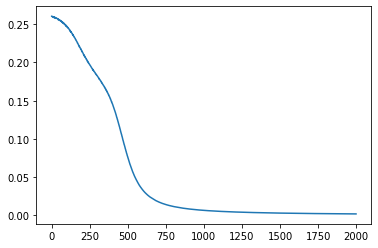

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['loss'])

In [ ]:
# epoch 값이 증가하는 부분에서 컷을한다(overfitting)

# 학습량이 적당한가에 대해서는 'loss'를 통해서 얻게 됨

In [71]:
# parameter tunning
# scikit-learn 사용해서 RandomizedSearchCV() : 돌릴수는 있으나 시간이 정말 길어지는 효과를 볼 수 있다.

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=2, activation='sigmoid', input_shape=(2,)),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1), loss='mse')

print (model.summary())
history = model.fit(x, y, epochs=1000, batch_size=1)
model.predict(x)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
None
Train on 4 samples
Epoch 1/1000
4/4 [==============================] - 0s 48ms/sample - loss: 0.2828
Epoch 2/1000
4/4 [==============================] - 0s 997us/sample - loss: 0.2796
Epoch 3/1000
4/4 [==============================] - 0s 748us/sample - loss: 0.2767
Epoch 4/1000
4/4 [==============================] - 0s 746us/sample - loss: 0.2741
Epoch 5/1000
4/4 [==============================] - 0s 748us/sample - loss: 0.2719
Epoch 6/1000
4/4 [==============================] - 0s 997us/sample - loss: 0.2699
E

4/4 [==============================] - 0s 748us/sample - loss: 0.2542
Epoch 92/1000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2542
Epoch 93/1000
4/4 [==============================] - 0s 722us/sample - loss: 0.2542
Epoch 94/1000
4/4 [==============================] - 0s 748us/sample - loss: 0.2541
Epoch 95/1000
4/4 [==============================] - 0s 983us/sample - loss: 0.2541
Epoch 96/1000
4/4 [==============================] - 0s 997us/sample - loss: 0.2542
Epoch 97/1000
4/4 [==============================] - 0s 997us/sample - loss: 0.2540
Epoch 98/1000
4/4 [==============================] - 0s 748us/sample - loss: 0.2540
Epoch 99/1000
4/4 [==============================] - 0s 994us/sample - loss: 0.2541
Epoch 100/1000
4/4 [==============================] - 0s 989us/sample - loss: 0.2541
Epoch 101/1000
4/4 [==============================] - 0s 748us/sample - loss: 0.2541
Epoch 102/1000
4/4 [==============================] - 0s 733us/sample - loss: 0.2540
Epoch

4/4 [==============================] - 0s 997us/sample - loss: 0.2527
Epoch 188/1000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2528
Epoch 189/1000
4/4 [==============================] - 0s 955us/sample - loss: 0.2528
Epoch 190/1000
4/4 [==============================] - 0s 737us/sample - loss: 0.2527
Epoch 191/1000
4/4 [==============================] - 0s 748us/sample - loss: 0.2528
Epoch 192/1000
4/4 [==============================] - 0s 997us/sample - loss: 0.2527
Epoch 193/1000
4/4 [==============================] - 0s 998us/sample - loss: 0.2527
Epoch 194/1000
4/4 [==============================] - 0s 997us/sample - loss: 0.2526
Epoch 195/1000
4/4 [==============================] - 0s 997us/sample - loss: 0.2526
Epoch 196/1000
4/4 [==============================] - 0s 748us/sample - loss: 0.2527
Epoch 197/1000
4/4 [==============================] - 0s 748us/sample - loss: 0.2527
Epoch 198/1000
4/4 [==============================] - 0s 748us/sample - loss: 0.25

4/4 [==============================] - 0s 733us/sample - loss: 0.2513
Epoch 284/1000
4/4 [==============================] - 0s 748us/sample - loss: 0.2512
Epoch 285/1000
4/4 [==============================] - 0s 997us/sample - loss: 0.2513
Epoch 286/1000
4/4 [==============================] - 0s 748us/sample - loss: 0.2512
Epoch 287/1000
4/4 [==============================] - 0s 997us/sample - loss: 0.2512
Epoch 288/1000
4/4 [==============================] - 0s 748us/sample - loss: 0.2512
Epoch 289/1000
4/4 [==============================] - 0s 980us/sample - loss: 0.2512
Epoch 290/1000
4/4 [==============================] - 0s 997us/sample - loss: 0.2512
Epoch 291/1000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2512
Epoch 292/1000
4/4 [==============================] - 0s 983us/sample - loss: 0.2511
Epoch 293/1000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2511
Epoch 294/1000
4/4 [==============================] - 0s 998us/sample - loss: 0.2510

4/4 [==============================] - 0s 732us/sample - loss: 0.2492
Epoch 380/1000
4/4 [==============================] - 0s 836us/sample - loss: 0.2491
Epoch 381/1000
4/4 [==============================] - 0s 735us/sample - loss: 0.2492
Epoch 382/1000
4/4 [==============================] - 0s 976us/sample - loss: 0.2491
Epoch 383/1000
4/4 [==============================] - 0s 764us/sample - loss: 0.2491
Epoch 384/1000
4/4 [==============================] - 0s 981us/sample - loss: 0.2490
Epoch 385/1000
4/4 [==============================] - 0s 748us/sample - loss: 0.2491
Epoch 386/1000
4/4 [==============================] - 0s 728us/sample - loss: 0.2490
Epoch 387/1000
4/4 [==============================] - 0s 982us/sample - loss: 0.2490
Epoch 388/1000
4/4 [==============================] - 0s 997us/sample - loss: 0.2490
Epoch 389/1000
4/4 [==============================] - 0s 997us/sample - loss: 0.2489
Epoch 390/1000
4/4 [==============================] - 0s 997us/sample - loss: 0.

4/4 [==============================] - 0s 991us/sample - loss: 0.2460
Epoch 476/1000
4/4 [==============================] - 0s 990us/sample - loss: 0.2460
Epoch 477/1000
4/4 [==============================] - 0s 997us/sample - loss: 0.2459
Epoch 478/1000
4/4 [==============================] - 0s 748us/sample - loss: 0.2459
Epoch 479/1000
4/4 [==============================] - 0s 997us/sample - loss: 0.2458
Epoch 480/1000
4/4 [==============================] - 0s 997us/sample - loss: 0.2458
Epoch 481/1000
4/4 [==============================] - 0s 997us/sample - loss: 0.2457
Epoch 482/1000
4/4 [==============================] - 0s 991us/sample - loss: 0.2457
Epoch 483/1000
4/4 [==============================] - 0s 748us/sample - loss: 0.2457
Epoch 484/1000
4/4 [==============================] - 0s 744us/sample - loss: 0.2457
Epoch 485/1000
4/4 [==============================] - 0s 986us/sample - loss: 0.2455
Epoch 486/1000
4/4 [==============================] - 0s 748us/sample - loss: 0.

4/4 [==============================] - 0s 729us/sample - loss: 0.2411
Epoch 572/1000
4/4 [==============================] - 0s 980us/sample - loss: 0.2410
Epoch 573/1000
4/4 [==============================] - 0s 748us/sample - loss: 0.2410
Epoch 574/1000
4/4 [==============================] - 0s 747us/sample - loss: 0.2409
Epoch 575/1000
4/4 [==============================] - 0s 764us/sample - loss: 0.2408
Epoch 576/1000
4/4 [==============================] - 0s 997us/sample - loss: 0.2407
Epoch 577/1000
4/4 [==============================] - 0s 748us/sample - loss: 0.2407
Epoch 578/1000
4/4 [==============================] - 0s 997us/sample - loss: 0.2406
Epoch 579/1000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2406
Epoch 580/1000
4/4 [==============================] - 0s 798us/sample - loss: 0.2405
Epoch 581/1000
4/4 [==============================] - 0s 998us/sample - loss: 0.2404
Epoch 582/1000
4/4 [==============================] - 0s 748us/sample - loss: 0.24

4/4 [==============================] - 0s 997us/sample - loss: 0.2336
Epoch 668/1000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2336
Epoch 669/1000
4/4 [==============================] - 0s 962us/sample - loss: 0.2335
Epoch 670/1000
4/4 [==============================] - 0s 997us/sample - loss: 0.2334
Epoch 671/1000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2333
Epoch 672/1000
4/4 [==============================] - 0s 748us/sample - loss: 0.2332
Epoch 673/1000
4/4 [==============================] - 0s 763us/sample - loss: 0.2331
Epoch 674/1000
4/4 [==============================] - 0s 982us/sample - loss: 0.2329
Epoch 675/1000
4/4 [==============================] - 0s 763us/sample - loss: 0.2329
Epoch 676/1000
4/4 [==============================] - 0s 745us/sample - loss: 0.2328
Epoch 677/1000
4/4 [==============================] - 0s 756us/sample - loss: 0.2327
Epoch 678/1000
4/4 [==============================] - 0s 973us/sample - loss: 0.2326

4/4 [==============================] - 0s 748us/sample - loss: 0.2232
Epoch 764/1000
4/4 [==============================] - 0s 748us/sample - loss: 0.2231
Epoch 765/1000
4/4 [==============================] - 0s 997us/sample - loss: 0.2230
Epoch 766/1000
4/4 [==============================] - 0s 748us/sample - loss: 0.2229
Epoch 767/1000
4/4 [==============================] - 0s 748us/sample - loss: 0.2227
Epoch 768/1000
4/4 [==============================] - 0s 750us/sample - loss: 0.2226
Epoch 769/1000
4/4 [==============================] - 0s 749us/sample - loss: 0.2224
Epoch 770/1000
4/4 [==============================] - 0s 748us/sample - loss: 0.2224
Epoch 771/1000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2222
Epoch 772/1000
4/4 [==============================] - 0s 997us/sample - loss: 0.2221
Epoch 773/1000
4/4 [==============================] - 0s 997us/sample - loss: 0.2220
Epoch 774/1000
4/4 [==============================] - 0s 997us/sample - loss: 0.22

4/4 [==============================] - 0s 1ms/sample - loss: 0.2095
Epoch 860/1000
4/4 [==============================] - 0s 987us/sample - loss: 0.2093
Epoch 861/1000
4/4 [==============================] - 0s 997us/sample - loss: 0.2092
Epoch 862/1000
4/4 [==============================] - 0s 748us/sample - loss: 0.2090
Epoch 863/1000
4/4 [==============================] - 0s 749us/sample - loss: 0.2088
Epoch 864/1000
4/4 [==============================] - 0s 997us/sample - loss: 0.2087
Epoch 865/1000
4/4 [==============================] - 0s 997us/sample - loss: 0.2085
Epoch 866/1000
4/4 [==============================] - 0s 748us/sample - loss: 0.2083
Epoch 867/1000
4/4 [==============================] - 0s 997us/sample - loss: 0.2082
Epoch 868/1000
4/4 [==============================] - 0s 997us/sample - loss: 0.2080
Epoch 869/1000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2078
Epoch 870/1000
4/4 [==============================] - 0s 755us/sample - loss: 0.2077

Epoch 956/1000
4/4 [==============================] - 0s 981us/sample - loss: 0.1909
Epoch 957/1000
4/4 [==============================] - 0s 748us/sample - loss: 0.1907
Epoch 958/1000
4/4 [==============================] - 0s 748us/sample - loss: 0.1905
Epoch 959/1000
4/4 [==============================] - 0s 748us/sample - loss: 0.1903
Epoch 960/1000
4/4 [==============================] - 0s 981us/sample - loss: 0.1900
Epoch 961/1000
4/4 [==============================] - 0s 997us/sample - loss: 0.1898
Epoch 962/1000
4/4 [==============================] - 0s 1ms/sample - loss: 0.1896
Epoch 963/1000
4/4 [==============================] - 0s 758us/sample - loss: 0.1893
Epoch 964/1000
4/4 [==============================] - 0s 987us/sample - loss: 0.1891
Epoch 965/1000
4/4 [==============================] - 0s 997us/sample - loss: 0.1889
Epoch 966/1000
4/4 [==============================] - 0s 1ms/sample - loss: 0.1886
Epoch 967/1000
4/4 [==============================] - 0s 999us/sample

array([[0.38645297],
       [0.72122717],
       [0.46451846],
       [0.43964016]], dtype=float32)

Regression, Classifier